```
..::NOTES::..
.............

Beyond a certain threshold N (horizon length) the allocation by JuMP must indeed go above 1 GB even after the first-run allocations peculiarity of Julia.
```

# 3D grasp optimization with three fingers - MPC

## Problem definition

In [19]:
load_termination_criteria = true
ϵ_admm_dual = 1e-5
include("ex9_data_mpc.jl");

## Load tools

In [20]:
@load_file "pipg_suite.jl" true
@load_file "pipg_var.jl" true
@load_file "mpc_utils.jl" true
@load_file "ex9_plotting.jl" false;

## Run MPC

In [21]:
timeit_var = mpc_utils.execute_mpc!(:warm_feas,false);

                                 ..:: MPC Simulation ::..
-------------------------------------------------------------------------------------------
  Solve Instant  |   Dyn. Err.   |  Rel. Dist. to Opt. |   Solve Time (ms)  |  JuMP Status  
-------------------------------------------------------------------------------------------
        1        |  2.443877e-04 |      7.369e-04      |      1.79e+01      |   OPTIMAL
        2        |  2.068915e-04 |      4.938e-04      |      1.84e+01      |   OPTIMAL
        3        |  1.663553e-04 |      4.297e-04      |      1.71e+01      |   OPTIMAL
        4        |  1.386818e-04 |      3.653e-04      |      1.86e+01      |   OPTIMAL
        5        |  1.330855e-04 |      2.834e-04      |      1.79e+01      |   OPTIMAL
        6        |  1.311068e-04 |      3.321e-04      |      2.00e+01      |   OPTIMAL
        7        |  1.306689e-04 |      4.438e-04      |      1.98e+01      |   OPTIMAL
        8        |  1.301235e-04 |      5.631e-04

## Visualization

In [13]:
# plotter.trajectory3D_matlab(mpc_utils.xmpc,mpc_utils.umpc[1:eX.NN-eX.N],eX.yy_unscl[1:eX.NN-eX.N+1],eX.NN-eX.N+1)

In [14]:
# plotter.trajectory3D(mpc_utils.xmpc,mpc_utils.umpc)

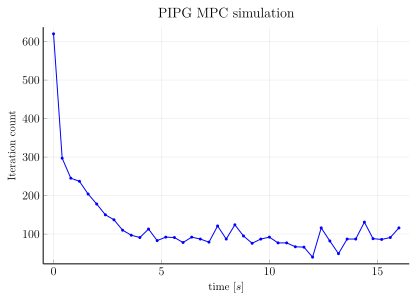

In [15]:
mpc_utils.plot_iter_count()

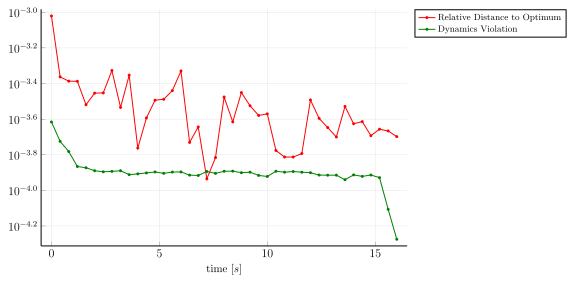

In [16]:
mpc_utils.plot_rd2o_dye()

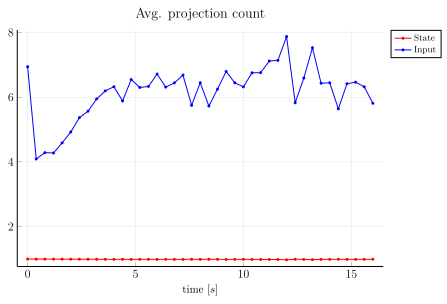

In [17]:
mpc_utils.plot_cum_proj()

## Benchmark MPC

In [22]:
show(timeit_var)

 ──────────────────────────────────────────────────────────────────────────
                                   Time                   Allocations      
                           ──────────────────────   ───────────────────────
     Tot / % measured:          59.2s / 5.72%           1.17GiB / 100%     

 Section           ncalls     time   %tot     avg     alloc   %tot      avg
 ──────────────────────────────────────────────────────────────────────────
 JuMP                  41    3.03s  89.4%  73.9ms   1.17GiB  100%   29.2MiB
 PIPG                  41    358ms  10.6%  8.74ms     0.00B  0.00%    0.00B
 Warm-start PIPG       41    136μs  0.00%  3.31μs   5.13KiB  0.00%     128B
 Power iteration        1    113μs  0.00%   113μs     0.00B  0.00%    0.00B
 ──────────────────────────────────────────────────────────────────────────